# MEST DAY 4

## Morning Session
### Computer Vision - Convolutional Neural Networks

* LeCun Paper - http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf

* Neural Network Zoo - https://www.asimovinstitute.org/neural-network-zoo/

### Use TensorFlow and Get Data

In [ ]:
!pip install tensorflow==2.0.0-beta0

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11493376/11490434 [==============================] - 7s 1us/step


In [5]:
print(train_images[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [6]:
import matplotlib.pyplot as plt

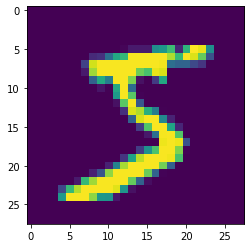

In [11]:
plt.imshow(train_images[0].reshape(28,28))

* Train a linear model

In [12]:
dense_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])
print(dense_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
dense_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

dense_model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2730 - accuracy: 0.9224
Epoch 2/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1254 - accuracy: 0.9637
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0857 - accuracy: 0.9741
Epoch 4/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0655 - accuracy: 0.9809s - loss: 0.0650 - accu
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0523 - accuracy: 0.9837


* Train a CNN

In [14]:
cnn_model = models.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu')
])
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 16)          2320      
Total params: 3,568
Trainable params: 3,568
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(16, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 16)          2320      
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)               

In [16]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 258us/sample - loss: 0.3046 - accuracy: 0.9016
Epoch 2/5
60000/60000 [==============================] - 15s 250us/sample - loss: 0.0942 - accuracy: 0.9713
Epoch 3/5
60000/60000 [==============================] - 16s 269us/sample - loss: 0.0729 - accuracy: 0.9776
Epoch 4/5
60000/60000 [==============================] - 20s 339us/sample - loss: 0.0610 - accuracy: 0.9809
Epoch 5/5
60000/60000 [==============================] - 20s 334us/sample - loss: 0.0546 - accuracy: 0.9828


In [17]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

### PyTorch

In [ ]:
from torch import nn
from torch.nn import functional as F

In [ ]:
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    
    # input layer to hidden layer
    self.hidden = nn.Linear( 28 * 28 * 1, 50)
    
    # output layer
    self.output = nn.Linear(50, 10)
    
    # activations
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)
    
  def forward(self, x):
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.softmax(x)
    
    return x

In [ ]:
model = LinearModel()
model

In [ ]:
class CNNModel(nn.Module):
  def __init__(self):
    super().__init__()
    # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
    self.conv1 = nn.Conv2d(1, 8, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(8, 16, 3)
    self.conv3 = nn.Conv2d(16, 16, 3)
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(16 * 3 * 3, 16)
    self.fc2 = nn.Linear(16, 10)
    
  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = self.pool(x)
    x = self.conv3(x)
    x = F.relu(x)
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.fc2(x)
    x = F.softmax(x)
    
    return x

In [ ]:
cnn = CNNModel()
cnn

### optimizer

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.01, momentum=0.9)

### get training data

### train

In [ ]:
epochs = 5
for i in range(epochs):
  loss = 0.0
  for i, data in enumerate(trainloader, 0)

## Afternoon Session
### Transfer Learning